## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report



 ## Load Datasets

In [2]:
df = pd.read_csv("datasets/bank.csv")
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Basic exploration

In [3]:
df.shape

(11162, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


In [7]:
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


## Target Variable Analysis

In [8]:
df ['deposit'].value_counts(normalize=True)

deposit
no     0.52616
yes    0.47384
Name: proportion, dtype: float64

## EDA 

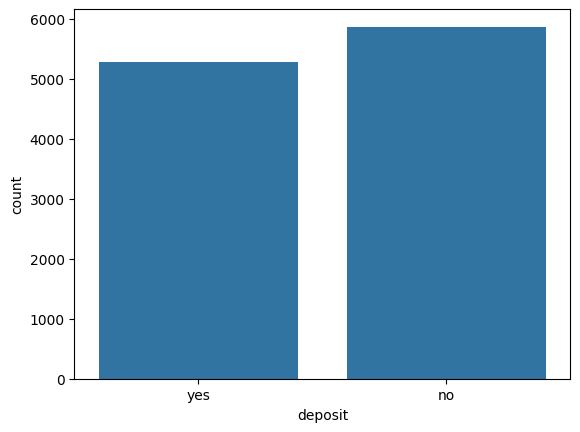

In [9]:
sns.countplot(x='deposit',data=df)
plt.show()

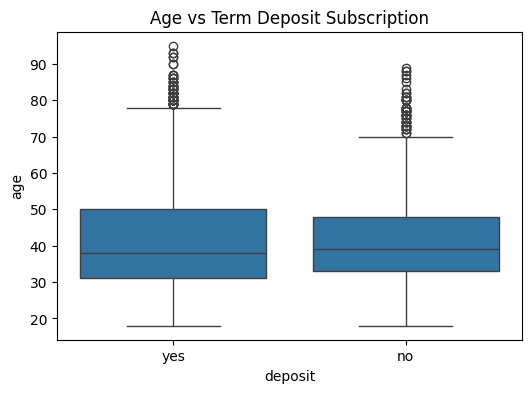

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x='deposit',y='age',data=df)
plt.title("Age vs Term Deposit Subscription")

plt.show()

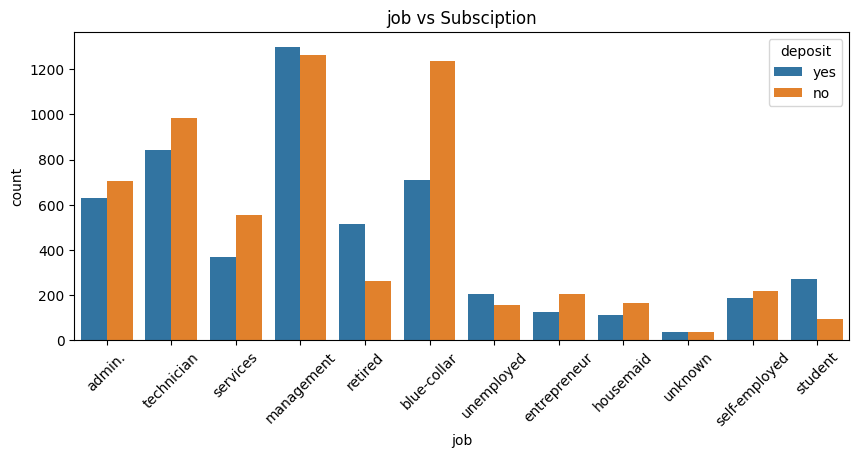

In [11]:
plt.figure(figsize=(10,4))
sns.countplot(x='job',hue='deposit',data=df)
plt.xticks(rotation=45)
plt.title("job vs Subsciption")

plt.show()

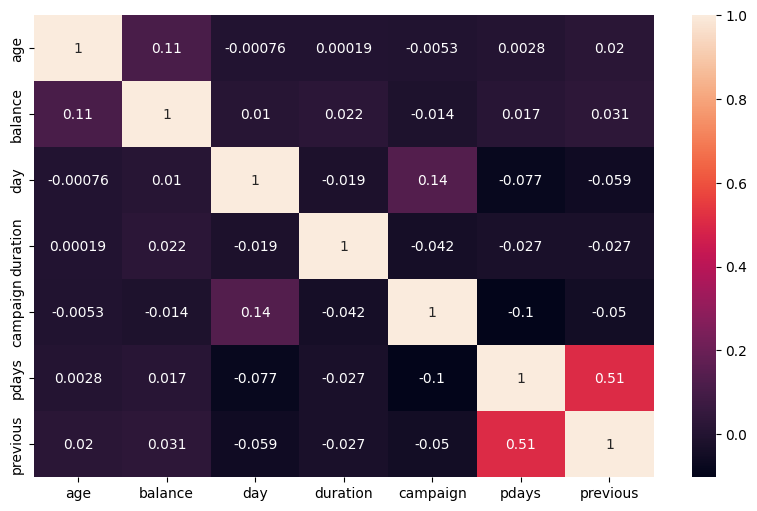

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True)
plt.show()

## Data Preprocessing 

In [13]:
df_encoded = pd.get_dummies(df,drop_first=True)
df_encoded.head()

X = df_encoded.drop('deposit_yes',axis=1)
y=df_encoded['deposit_yes']

X_train, X_test , y_train, y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [14]:
scaler =StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model 1 - Logistic Regression 

In [15]:
model =LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
y_pred_log=model.predict(X_test)

## Model Evalution

In [16]:
y_pred = model.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("precision:",precision_score(y_test,y_pred))
print("recall:",recall_score(y_test,y_pred))
print("f1:",f1_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

confusion_matrix(y_test,y_pred)

Accuracy: 0.8083296014330497
precision: 0.8111002921129503
recall: 0.7806935332708529
f1: 0.7956064947468959
[[972 194]
 [234 833]]
              precision    recall  f1-score   support

       False       0.81      0.83      0.82      1166
        True       0.81      0.78      0.80      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



array([[972, 194],
       [234, 833]])

In [17]:
accuracy =accuracy_score(y_test,y_pred)
accuracy

0.8083296014330497

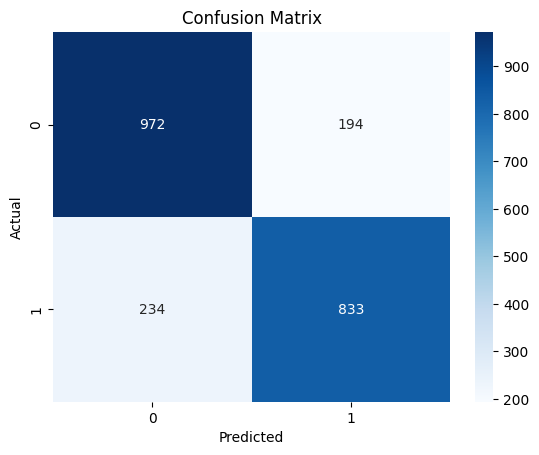

              precision    recall  f1-score   support

       False       0.81      0.83      0.82      1166
        True       0.81      0.78      0.80      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



In [18]:
cm=confusion_matrix(y_test,y_pred)
cm
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test,y_pred))

## Model 2 - Decision Tree

In [19]:
dt_model=DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)
y_pred_dt=dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7899686520376176
              precision    recall  f1-score   support

       False       0.80      0.81      0.80      1166
        True       0.78      0.77      0.78      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233



## Model 3 - Random Forest

In [20]:
rf_model=RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf=rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8405732198835647
              precision    recall  f1-score   support

       False       0.87      0.82      0.84      1166
        True       0.81      0.86      0.84      1067

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233



## Model 4 - KNN

In [21]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn=knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.7666815942678011
              precision    recall  f1-score   support

       False       0.75      0.83      0.79      1166
        True       0.79      0.70      0.74      1067

    accuracy                           0.77      2233
   macro avg       0.77      0.76      0.76      2233
weighted avg       0.77      0.77      0.77      2233



## Model comparison

In [22]:
Models={"Logistic Regression": accuracy_score(y_test,y_pred),
        "Decision Tree": accuracy_score(y_test, y_pred_dt),
        "Random Forest": accuracy_score(y_test, y_pred_rf),
        "KNN": accuracy_score(y_test, y_pred_knn)
        }
model_results=pd.DataFrame(Models.items(),columns=['Model','Accuracy'])
print(model_results)

                 Model  Accuracy
0  Logistic Regression  0.808330
1        Decision Tree  0.789969
2        Random Forest  0.840573
3                  KNN  0.766682
